# 5. Hafta Lab-2: K-Means Kümeleme Algoritması
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak
Bu lab çalışmasında k-ortalamalar kümeleme yöntemini sentetik bir veri kümesinde uygulayacağız.

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets.samples_generator import make_blobs

Euclidean uzaklık hesaplamak için bir metod tanımlayalım

In [2]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

*make_blobs* metodu kullanarak 1000 adet örnek içeren standart sapması 2.5 olan 3 küme içeren veri kümesi, $\mathcal{X} \in \mathbb{R}^{1000 \times 2}$, oluştur.

In [3]:
np.random.seed(100)
X, labels_true = make_blobs(n_samples=1000, cluster_std=2.5)

Küme sayısı 3 olduğundan 3 adet rastgele centroid belirleyelim. Veri kümesi ve centroidleri gösterelim.

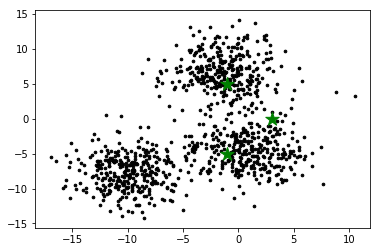

In [4]:
k = 3
C_x = np.random.randint(np.min(X), np.max(X)-2, size=k)
C_y = np.random.randint(np.min(X), np.max(X)-2, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

plt.scatter(X[:,0], X[:,1], c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()

Eski centroid değerlerini ve küme etiketlerini kaydetmek için iki vektör tanımlayalım.

In [5]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

Hata fonksiyonumuz.

In [6]:
error = dist(C, C_old, None)

Centroid değerleri farklı olduğunda iterasyona devam edecek bir for döngüsü ile centroidleri hesaplayalım.

In [7]:
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

Oluşan kümeleri görselleştirelim.

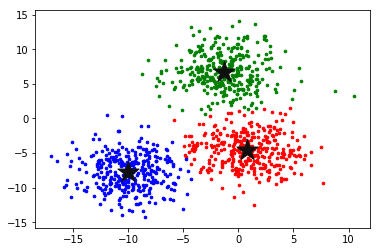

In [8]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=500, c='#0f0f0f')

plt.show()